In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import os
from sklearn.model_selection import train_test_split
from Cleaning import *
import Cleaning as functions
from sklearn.metrics import classification_report , accuracy_score 
from sklearn import (metrics, linear_model, preprocessing)
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
print ('default',os.getcwd())

default /Users/flatironschool/Desktop/london-ds-111819/MY_Class_Edits/projects/Predicting_Life_Expectancy


In [3]:
pd.set_option('display.max_rows', 200)
pd.options.mode.chained_assignment = None

In [4]:
path = 'dataset/analytic_data2019.csv'
df=pd.read_csv(path, na_values='NA' , skiprows=1)
df

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
0,0,0,0,US,United States,2019,NaN,6900.630354,3745538.0,908266078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1000,AL,Alabama,2019,NaN,9917.232898,80440.0,13636816.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1001,AL,Autauga County,2019,1.0,8824.057123,815.0,156132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,1003,AL,Baldwin County,2019,1.0,7224.632160,2827.0,576496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,1005,AL,Barbour County,2019,1.0,9586.165037,451.0,72222.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,2019,1.0,7497.439952,495.0,127427.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3190,56,39,56039,WY,Teton County,2019,1.0,3786.128226,124.0,66351.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3191,56,41,56041,WY,Uinta County,2019,1.0,7790.302043,262.0,59466.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3192,56,43,56043,WY,Washakie County,2019,1.0,5504.650970,108.0,22335.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <a id='7'>EDA<a/>

In [5]:
print('Life Expectancy Data - rows:' , df.shape[0],'columns:', df.shape[1])

Life Expectancy Data - rows: 3194 columns: 534


# Checking for Percentage of Null Values in the dataframe

In [6]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()


,v139_denominator,v104_cihigh,v124_cilow,v124_cihigh,v137_numerator,v058_cihigh,v058_cilow,v147_numerator,v147_denominator,v144_numerator,...,v067_cihigh,v137_rawvalue,v137_denominator,v137_cilow,v137_cihigh,v057_rawvalue,v060_rawvalue,v060_numerator,v060_denominator,statecode
Total,3194.0,3194.0,3194.0,3194.0,3194.0,3194.0,3194.0,3194.0,3194.0,3194.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Check for Duplicates

In [8]:
check_duplicates(df)

You are all clear of duplicates


,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
0,0,0,0,US,United States,2019,NaN,6900.630354,3745538.0,908266078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1000,AL,Alabama,2019,NaN,9917.232898,80440.0,13636816.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1001,AL,Autauga County,2019,1.0,8824.057123,815.0,156132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,1003,AL,Baldwin County,2019,1.0,7224.632160,2827.0,576496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,1005,AL,Barbour County,2019,1.0,9586.165037,451.0,72222.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,2019,1.0,7497.439952,495.0,127427.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3190,56,39,56039,WY,Teton County,2019,1.0,3786.128226,124.0,66351.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3191,56,41,56041,WY,Uinta County,2019,1.0,7790.302043,262.0,59466.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3192,56,43,56043,WY,Washakie County,2019,1.0,5504.650970,108.0,22335.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.tail()

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
3189,56,37,56037,WY,Sweetwater County,2019,1.0,7497.439952,495.0,127427.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3190,56,39,56039,WY,Teton County,2019,1.0,3786.128226,124.0,66351.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3191,56,41,56041,WY,Uinta County,2019,1.0,7790.302043,262.0,59466.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3192,56,43,56043,WY,Washakie County,2019,1.0,5504.650970,108.0,22335.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3193,56,45,56045,WY,Weston County,2019,1.0,4991.168273,82.0,19599.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['statecode', 'countycode', 'fipscode', 'state', 'county', 'year',
       'county_ranked', 'v001_rawvalue', 'v001_numerator', 'v001_denominator',
       ...
       'v013_rawvalue', 'v016_rawvalue', 'v017_rawvalue', 'v025_rawvalue',
       'v026_rawvalue', 'v027_rawvalue', 'v031_rawvalue', 'v032_rawvalue',
       'v035_rawvalue', 'v097_rawvalue'],
      dtype='object', length=534)

# Only keeping county details ,setting the Primary length of life Health Outcome as our target and health factors as features

In [11]:
county_info = ['statecode','countycode','fipscode','state','county','year','county_ranked']
target_outcome = ['v001_rawvalue']
ranked_measures = ['v009_rawvalue','v011_rawvalue','v133_rawvalue',
                   'v070_rawvalue', 'v132_rawvalue', 'v049_rawvalue',
                   'v134_rawvalue', 'v045_rawvalue', 'v014_rawvalue',
                   'v085_rawvalue', 'v004_rawvalue', 'v088_rawvalue',
                   'v062_rawvalue', 'v005_rawvalue', 'v050_rawvalue',
                   'v155_rawvalue', 'v021_rawvalue', 'v069_rawvalue',
                   'v023_rawvalue', 'v024_rawvalue', 'v044_rawvalue',
                   'v082_rawvalue', 'v140_rawvalue', 'v043_rawvalue',
                   'v135_rawvalue', 'v125_rawvalue', 'v124_rawvalue',
                   'v136_rawvalue', 'v067_rawvalue', 'v137_rawvalue']

In [12]:
df_new = df[county_info + target_outcome + ranked_measures]

In [13]:
df_new.head()

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v009_rawvalue,v011_rawvalue,...,v044_rawvalue,v082_rawvalue,v140_rawvalue,v043_rawvalue,v135_rawvalue,v125_rawvalue,v124_rawvalue,v136_rawvalue,v067_rawvalue,v137_rawvalue
0,0,0,0,US,United States,2019,NaN,6900.630354,NaN,0.285,...,4.941486,0.332517,9.300353,386.464896,67.387264,NaN,NaN,0.183731,0.764422,0.352
1,1,0,1000,AL,Alabama,2019,NaN,9917.232898,0.215382,0.351,...,5.238579,0.381046,12.242716,479.919182,79.908979,11.0,0.074627,0.149122,0.858685,0.337
2,1,1,1001,AL,Autauga County,2019,1.0,8824.057123,0.191247,0.375,...,4.636664,0.247001,12.631731,272.282220,74.031808,11.7,0.000000,0.149546,0.859651,0.383
3,1,3,1003,AL,Baldwin County,2019,1.0,7224.632160,0.167955,0.310,...,4.518560,0.251841,10.692213,203.660396,69.374289,10.3,1.000000,0.138317,0.847194,0.405
4,1,5,1005,AL,Barbour County,2019,1.0,9586.165037,0.215409,0.443,...,5.755063,0.572157,8.472944,414.277861,72.900134,11.5,0.000000,0.154555,0.834044,0.338


In [14]:
print('Life Expectancy Data - rows:' , df_new.shape[0],'columns:', df_new.shape[1])

Life Expectancy Data - rows: 3194 columns: 38


In [15]:
# generating a dictionary with the raw column names and more interpretable names
"""path is where i stored the csv file in notebook in the intial part of the notebook"""
columns_dict = create_column_dict(path)

# renaming the columns to be more interpretable
df_new.rename(columns=columns_dict, inplace=True)

In [16]:
df_new.columns

Index(['statecode', 'countycode', 'fipscode', 'state', 'county', 'year',
       'county_ranked', 'premature_death_raw_value', 'adult_smoking_raw_value',
       'adult_obesity_raw_value', 'food_environment_index_raw_value',
       'physical_inactivity_raw_value',
       'access_to_exercise_opportunities_raw_value',
       'excessive_drinking_raw_value',
       'alcohol_impaired_driving_deaths_raw_value',
       'sexually_transmitted_infections_raw_value', 'teen_births_raw_value',
       'uninsured_raw_value', 'primary_care_physicians_raw_value',
       'dentists_raw_value', 'mental_health_providers_raw_value',
       'preventable_hospital_stays_raw_value',
       'mammography_screening_raw_value', 'flu_vaccinations_raw_value',
       'high_school_graduation_raw_value', 'some_college_raw_value',
       'unemployment_raw_value', 'children_in_poverty_raw_value',
       'income_inequality_raw_value',
       'children_in_single_parent_households_raw_value',
       'social_associations_raw_va

In [17]:
df_new.county_ranked.value_counts()

1.0    3081
0.0      61
Name: county_ranked, dtype: int64

In [18]:
df_new['county_ranked'].unique()

array([nan,  1.,  0.])

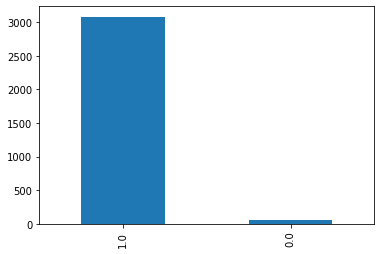

In [19]:
df_new.county_ranked.value_counts().plot(kind = 'bar')

# Observations: 
    3081 rows are ranked and 61 arent ranked so decision is to drop these columns along with the null values too.

In [33]:
# Dropping the rows that arent Ranked
County_health = df_new[df_new['county_ranked'] == 1].copy()
County_health.reset_index(inplace = True, drop = True)

In [21]:
County_health.head()

,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death_raw_value,adult_smoking_raw_value,adult_obesity_raw_value,...,income_inequality_raw_value,children_in_single_parent_households_raw_value,social_associations_raw_value,violent_crime_raw_value,injury_deaths_raw_value,air_pollution_particulate_matter_raw_value,drinking_water_violations_raw_value,severe_housing_problems_raw_value,driving_alone_to_work_raw_value,long_commute_driving_alone_raw_value
0,1,1,1001,AL,Autauga County,2019,1.0,8824.057123,0.191247,0.375,...,4.636664,0.247001,12.631731,272.282220,74.031808,11.7,0.0,0.149546,0.859651,0.383
1,1,3,1003,AL,Baldwin County,2019,1.0,7224.632160,0.167955,0.310,...,4.518560,0.251841,10.692213,203.660396,69.374289,10.3,1.0,0.138317,0.847194,0.405
2,1,5,1005,AL,Barbour County,2019,1.0,9586.165037,0.215409,0.443,...,5.755063,0.572157,8.472944,414.277861,72.900134,11.5,0.0,0.154555,0.834044,0.338
3,1,7,1007,AL,Bibb County,2019,1.0,11783.543675,0.199164,0.378,...,4.254594,0.295654,10.157665,89.349126,100.077937,11.2,0.0,0.109609,0.863659,0.486
4,1,9,1009,AL,Blount County,2019,1.0,10908.101822,0.196522,0.344,...,4.126883,0.295697,9.011507,482.690611,105.197227,11.7,0.0,0.104012,0.867923,0.597


In [22]:
print('Life Expectancy Data - rows:' , County_health.shape[0],'columns:', County_health.shape[1])

Life Expectancy Data - rows: 3081 columns: 38


In [23]:
# Check again for percentage of null values in the dataframe , if more than 50% we will drop those columns
## else we will just simply drop all unnecessary nulls in dataframe

In [24]:
total = County_health.isnull().sum().sort_values(ascending = False)
percent = (County_health.isnull().sum()/County_health.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()


,mental_health_providers_raw_value,violent_crime_raw_value,primary_care_physicians_raw_value,sexually_transmitted_infections_raw_value,teen_births_raw_value,dentists_raw_value,high_school_graduation_raw_value,injury_deaths_raw_value,drinking_water_violations_raw_value,air_pollution_particulate_matter_raw_value,...,uninsured_raw_value,driving_alone_to_work_raw_value,some_college_raw_value,unemployment_raw_value,children_in_poverty_raw_value,income_inequality_raw_value,children_in_single_parent_households_raw_value,social_associations_raw_value,severe_housing_problems_raw_value,statecode
Total,230.000000,173.00000,134.000000,105.000000,86.000000,85.000000,77.000000,47.000000,42.000000,29.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,7.465109,5.61506,4.349237,3.407984,2.791302,2.758845,2.499189,1.525479,1.363194,0.941253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Since null values arent too much we can simply drop all the null values in the dataframe

In [35]:
County_health_new = County_health.copy()

In [36]:
County_health_new1 = County_health_new.dropna(axis=0 , how = 'any')
County_health_new1.reset_index(inplace=True, drop=True)

In [40]:
# Check results
County_health_new1.isna().sum()

statecode                                         0
countycode                                        0
fipscode                                          0
state                                             0
county                                            0
year                                              0
county_ranked                                     0
premature_death_raw_value                         0
adult_smoking_raw_value                           0
adult_obesity_raw_value                           0
food_environment_index_raw_value                  0
physical_inactivity_raw_value                     0
access_to_exercise_opportunities_raw_value        0
excessive_drinking_raw_value                      0
alcohol_impaired_driving_deaths_raw_value         0
sexually_transmitted_infections_raw_value         0
teen_births_raw_value                             0
uninsured_raw_value                               0
primary_care_physicians_raw_value                 0
dentists_raw

In [42]:
County_health_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 38 columns):
statecode                                         2473 non-null int64
countycode                                        2473 non-null int64
fipscode                                          2473 non-null int64
state                                             2473 non-null object
county                                            2473 non-null object
year                                              2473 non-null int64
county_ranked                                     2473 non-null float64
premature_death_raw_value                         2473 non-null float64
adult_smoking_raw_value                           2473 non-null float64
adult_obesity_raw_value                           2473 non-null float64
food_environment_index_raw_value                  2473 non-null float64
physical_inactivity_raw_value                     2473 non-null float64
access_to_exercise_opportunities_raw_va

In [43]:
# Check results
County_health_new1.shape

(2473, 38)

In [44]:
# # Save It as a CV file
County_health_new1.to_csv("Cleaned_health_data.csv" , index = False)